# **4.10 IC Final Analysis & Customer Profiling**

# **Region segmentation, customer profiling, and final deliverables**

In this notebook, I begin by importing the merged dataset that combines customers, orders, and products. To ensure data security, I address any personally identifiable information (PII) before proceeding with analysis. I then segment customers by U.S. regions and compare spending habits across these regions to identify potential differences in consumer behaviour. Next, I exclude low-activity customers, as these are not of interest to Instacart’s Cheif Financial Officer (CFO), and focus instead on higher-value customers. Building on this, I create customer profiles using both demographic information (such as age, income, and dependants) and behavioural data (such as order timing and product preferences). To support interpretation, I generate visualisations that illustrate these results, and I also aggregate key metrics like spending and order frequency at the customer-profile level. Finally, I export the cleaned data and visualisations to support reporting and strategic decision-making.

## Table of Contents  
- [1. Import Libraries & Data](#1-import-libraries-&-data)  
- [2. Data Security](#2-data-security)
- [3. Region Segmentation](#3-region-segmentation)  
- [4. Exclusion Flag](#4-exclusion-flag)  
- [5. Customer Profiling](#5-customer-profiling)  
- [6. Profile Distribution Visualisation](#6-profile-distribution-visualisation)
- [7. Profile-level Aggregation](#7-profile-level-aggregation)  
- [8. Profiles x Regions Cross-Analysis](#8-profiles-x-regions-cross-analysis)
- [9. Export Final Data](#9-export-final-data)

---

## 1. Import Libraries and Data
I begin by importing the analysis and visualisation libraries required for this task:
- `pandas` and `numpy` for data manipulation
- `os` for file handling
- `matplotlib` and `seaborn` for visualisations,
- `scipy` for statistical operations (if needed).

I then load the merged dataset (ords_prods_all.pkl) which contains orders, products, and customer data.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing df_ords_prods_merge
path = r'/Users/yaseminmustafa/Desktop/CareerFoundry/Exercise 4/15-05-2025_Instacart Basket Analysis'

In [3]:
df_ords_prods_all = pd.read_pickle(os.path.join(path,"02_Data/Prepared Data/ords_prods_all.pkl"))

---

## 2. Data Security
Customer names are personally identifiable information (PII). Before continuing, I drop first_name and surname so I don't retain direct identifiers in analysis outputs.

In [4]:
# Check output 
df_ords_prods_all.head()

,user_id,first_name,surname,gender,state,age,date_joined,number_of_dependants,family_status,income,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,median_order,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Average orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regularly busy,Regularly busy,Most orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Low-range product,Regularly busy,Busiest days,Average orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer


In [5]:
# Check shape
df_ords_prods_all.shape

(30328763, 34)

In [6]:
# Check columns
df_ords_prods_all.columns

Index(['user_id', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'number_of_dependants', 'family_status', 'income',
       'order_id', 'dataset_label', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_spending', 'spending_flag', 'median_order',
       'order_frequency_flag'],
      dtype='object')

*The columns 'first_name' and 'surname' both contain personally identifiable information (PII), that can be traced back to a particular person. Therefore, these two columns should be dropped for security.*

In [7]:
# Dropping columns for PII data protection
df_ords_prods_all_2 = df_ords_prods_all.drop(columns = ['first_name', 'surname'])

In [8]:
# Check ouptut
df_ords_prods_all_2.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,dataset_label,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,median_order,order_frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,Mid-range product,Regularly busy,Regularly busy,Average orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Low-range product,Regularly busy,Regularly busy,Most orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2505178,prior,...,Low-range product,Regularly busy,Busiest days,Average orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer


In [9]:
# Check shape
df_ords_prods_all_2.shape

(30328763, 32)

---

## 3. Region Segmentation
I create a region column by mapping states into U.S. regions (Northeast, Midwest, South, West). This enables regional comparisons. The mapping here follows a standard US Census-like grouping (you may adjust any state assignments if needed).

In [10]:
# Region mapping using U.S. Census Bureau classification
def get_region(state):
    northeast = [
        'Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont',
        'New Jersey', 'New York', 'Pennsylvania'
    ]
    midwest = [
        'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio',
        'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'
    ]
    south = [
        'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina',
        'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama',
        'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'
    ]
    west = [
        'Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico',
        'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'
    ]

    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Other'

In [11]:
# Apply to dataFrame
df_ords_prods_all_2['region'] = df_ords_prods_all_2['state'].apply(get_region)

In [12]:
# Check output
df_ords_prods_all_2.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,dataset_label,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,median_order,order_frequency_flag,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,Regularly busy,Regularly busy,Average orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Regularly busy,Regularly busy,Most orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Regularly busy,Regularly busy,Most orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Regularly busy,Regularly busy,Most orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2505178,prior,...,Regularly busy,Busiest days,Average orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer,Midwest


In [13]:
# Check shape
df_ords_prods_all_2.shape

(30328763, 33)

---

## 4. Spending Behaviour by Region
I compare spending_flag (Low spender/High spender) across regions using a crosstab and a bar chart. This helps answer whether spending differs by region.

In [14]:
# Basic cross-tabulation
spending_by_region = pd.crosstab(df_ords_prods_all_2['region'], df_ords_prods_all_2['spending_flag'])
print(spending_by_region)

spending_flag  High spender  Low spender
region                                  
Midwest               29975      7077611
Northeast             19217      5337055
South                 40593     10059224
West                  31312      7733776


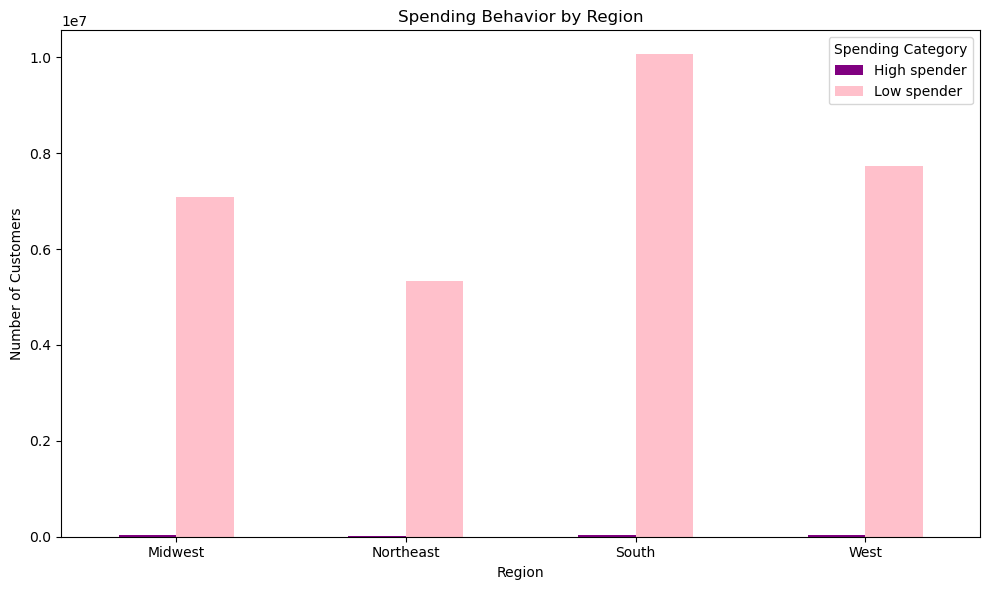

In [15]:
# Plot the clustered column chart
spending_by_region = spending_by_region.plot(kind = 'bar', figsize = (10, 6), color = ['purple', 'pink'])

# Chart details
plt.title('Spending Behavior by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.legend(title='Spending Category')
plt.tight_layout()

*Majority if customers are low spenders in all regions, however, the South has the greatest number of both high and low spenders overall. The Northeast has the fewest of both high and low spenders compared to other regions.*

In [16]:
# Export bar chart as a png
spending_by_region.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'spending_by_region.png'))

---

## 5. Exclusion Flag
I create an activity_customer_level flag: 
- customers with max_order less than 5 are "Low-activity Customer"
- customers with max_order equal to or greater than 5 are "High-activity Customer"

I then export both low-activity and high-activity subsets for the Chief Financial Officer (CFO) and downstream use.

In [17]:
#Creating an exclusion flag
# Low-activity customers = max_order < 5
# High-activity customer = max_order >=5

activity_customer=[]

for value in df_ords_prods_all_2['max_order']:
    if value <5:
        activity_customer.append('Low-activity Customer')
    elif value >=5:
        activity_customer.append('High-activity Customer')
    else: activity_customer.append('Not enough information')
df_ords_prods_all_2['activity_customer_level']=activity_customer

In [18]:
df_ords_prods_all_2.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,dataset_label,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,median_order,order_frequency_flag,region,activity_customer_level
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,Regularly busy,Average orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,High-activity Customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Regularly busy,Most orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,High-activity Customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Regularly busy,Most orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,High-activity Customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Regularly busy,Most orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,High-activity Customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2505178,prior,...,Busiest days,Average orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,High-activity Customer


In [19]:
df_ords_prods_all_2.shape

(30328763, 34)

In [20]:
#Checking the function
df_ords_prods_all_2['activity_customer_level'].value_counts(dropna = False)

activity_customer_level
High-activity Customer    29303281
Low-activity Customer      1025482
Name: count, dtype: int64

Text(0, 0.5, 'Number of Customers')

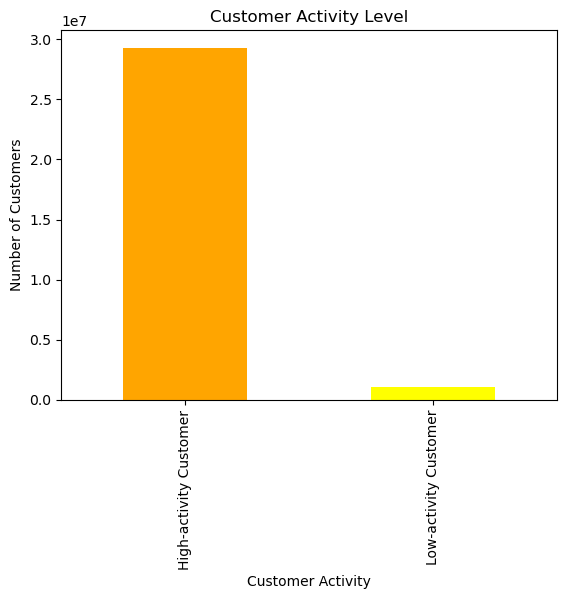

In [21]:
# Creating visualistaion
activity_customer_level = df_ords_prods_all_2['activity_customer_level'].value_counts().plot.bar(color =['orange', 'yellow',])

plt.title('Activity_Customer_Level')
plt.title('Customer Activity Level')
plt.xlabel('Customer Activity')
plt.ylabel('Number of Customers')

In [22]:
# Export bar chart as a png
activity_customer_level.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'activity_customer_level.png'))

In [23]:
# Subsetting a new df based on a low-activity customer
df_low_activity_cust = df_ords_prods_all_2[df_ords_prods_all_2['activity_customer_level']=='Low-activity Customer']

In [24]:
# Export data to pkl
df_low_activity_cust.to_pickle(os.path.join(path, '02_Data','Prepared Data', 'low_activity_customer.pkl'))

In [25]:
# Subsetting a new df based on a high-activity customer
df_high_activity_cust = df_ords_prods_all_2[df_ords_prods_all_2['activity_customer_level']=='High-activity Customer']

In [26]:
# Export data to pkl
df_high_activity_cust.to_pickle(os.path.join(path, '02_Data','Prepared Data', 'high_activity_customer.pkl'))

---

## 6. Customer Profiling
I create a customer_profile using a set of business-driven conditions (age, dependents, income, department preferences, order timing). I use np.select to apply the rules and fall back to "General Customer".

In [27]:
# Define conditions
conditions = [
    (df_ords_prods_all_2['age'] < 30) & (df_ords_prods_all_2['number_of_dependants'] == 0) & (df_ords_prods_all_2['income'] < 40000),
    (df_ords_prods_all_2['age'] >= 30) & (df_ords_prods_all_2['number_of_dependants'] >= 1) & 
        (df_ords_prods_all_2['income'] < 70000) & (df_ords_prods_all_2['department_id'].isin([18])),
    (df_ords_prods_all_2['income'] >= 100000) & (df_ords_prods_all_2['department_id'].isin([5, 6, 12])),
    (df_ords_prods_all_2['order_hour_of_day'] >= 21) | (df_ords_prods_all_2['order_hour_of_day'] <= 5),
    (df_ords_prods_all_2['orders_day_of_week'].isin([0, 1])) & (df_ords_prods_all_2['number_of_dependants'] >= 2)
]

# Define corresponding profile labels
choices = [
    'Single Budget Adult',
    'Young Parent',
    'Affluent Shopper',
    'Night Owl Shopper',
    'Weekend Family Shopper'
]

# Apply conditions
df_ords_prods_all_2['customer_profile'] = np.select(conditions, choices, default='General Customer')

In [28]:
df_ords_prods_all_2.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,dataset_label,...,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,median_order,order_frequency_flag,region,activity_customer_level,customer_profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,prior,...,Average orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,High-activity Customer,General Customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Most orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,High-activity Customer,General Customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Most orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,High-activity Customer,General Customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,prior,...,Most orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,High-activity Customer,General Customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2505178,prior,...,Average orders,8.0,New customer,8.205882,Low spender,19.0,Regular customer,Midwest,High-activity Customer,Weekend Family Shopper


In [29]:
df_ords_prods_all_2.shape

(30328763, 35)

---

## 7. Profile Distribution Visualisation
Visualise profile counts so marketing can see which groups are largest and target accordingly.

In [30]:
# Count profile occurrences
profile_counts = df_ords_prods_all_2['customer_profile'].value_counts()

In [31]:
# Check output
profile_counts

customer_profile
General Customer          22379193
Weekend Family Shopper     5065445
Night Owl Shopper          2223395
Affluent Shopper            512827
Single Budget Adult         104234
Young Parent                 43669
Name: count, dtype: int64

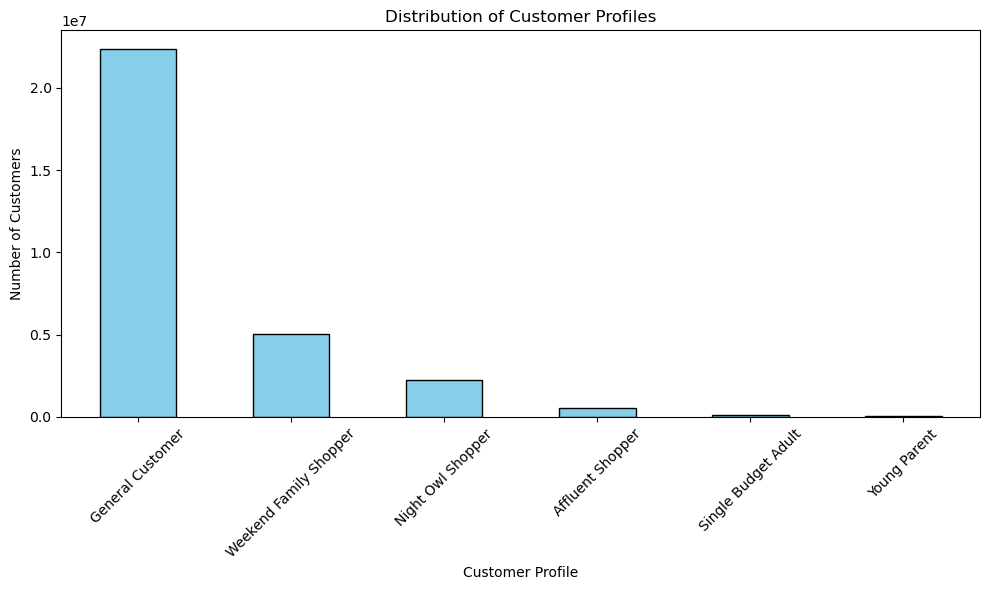

In [32]:
# Plot bar chart
plt.figure(figsize=(10, 6))
customer_profiles = df_ords_prods_all_2['customer_profile'].value_counts().plot.bar(
    color='skyblue',
    edgecolor='black'
)
plt.title('Distribution of Customer Profiles')
plt.xlabel('Customer Profile')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
# Export bar chart as a png
customer_profiles.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'customer_profiles.png'))

---

## 8. Profile-Level Aggregation 
I aggregate order_number and prices by customer_profile to get min, mean and max values — useful for product targeting and expected revenue per profile.

In [34]:
# aggregate max, min and mean variables on 'customer_profile'  
agg_results = df_ords_prods_all_2.groupby('customer_profile')[['order_number', 'prices']].agg(['min', 'mean', 'max'])

In [35]:
# Check output
print(agg_results)

                       order_number                  prices                 
                                min       mean   max    min       mean   max
customer_profile                                                            
Affluent Shopper                2.0  17.132887  99.0    1.0  13.362478  25.0
General Customer                2.0  18.434547  99.0    1.0   7.695618  25.0
Night Owl Shopper               2.0  17.942972  99.0    1.0   7.721935  25.0
Single Budget Adult             2.0  16.791604  99.0    1.0   6.475605  25.0
Weekend Family Shopper          2.0  17.678091  99.0    1.0   7.711408  25.0
Young Parent                    2.0  20.367080  99.0    1.0   7.434031  15.0


---

## 9. Profiles × Regions Cross-Analysis
I cross-tabulate profiles by region and show counts. This helps detect regional differences in profiles that may guide regional marketing strategies.

In [36]:
# Crosstab: how many of each profile in each region
profile_region_ct = pd.crosstab(df_ords_prods_all_2['customer_profile'], df_ords_prods_all_2['region'])

In [37]:
# Check output
print(profile_region_ct)

region                  Midwest  Northeast    South     West
customer_profile                                            
Affluent Shopper         121496      91296   169226   130809
General Customer        5255245    3943175  7450091  5730682
Night Owl Shopper        524084     398685   742141   558485
Single Budget Adult       21491      18378    34161    30204
Weekend Family Shopper  1175536     896323  1689452  1304134
Young Parent               9734       8415    14746    10774


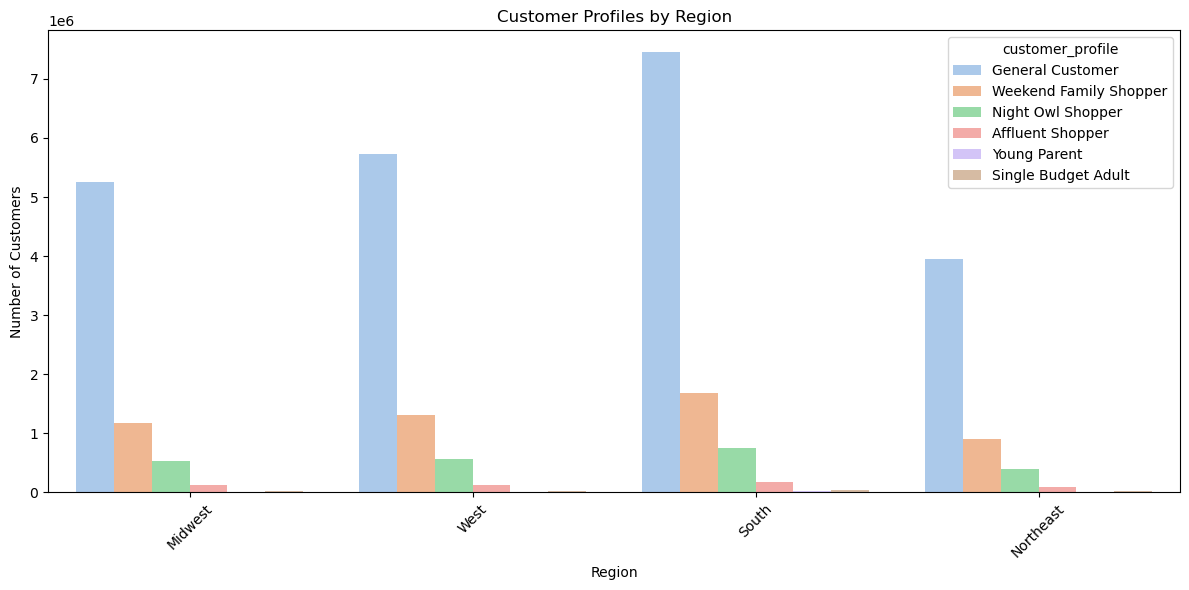

In [38]:
# Creating visualistaion 
plt.figure(figsize=(12, 6))
profile_region_ct = sns.countplot(data=df_ords_prods_all_2, x='region', hue='customer_profile', palette='pastel')
plt.title('Customer Profiles by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*The General Customers profile constitutes the largest group across all regions, with the highest concentration in the South. In contrast, Affluent Shoppers represent one of the smallest customer segments overall, especially underrepresented in the Northeast region. The Weekend Family Shoppers are particularly prominent in the South, suggesting a strong presence of family-oriented households who likely shop together during weekends. Their presence is notably lower in the Northeast. Similarly, the Night Owl Shoppers, are most common in the South and least common in the Northeast, which may reflect differing lifestyle or work patterns across regions. Both Young Parents and Single Budget Adults consistently appear as minor segments across all regions, indicating that these profiles represent a relatively small portion of the customer base regardless of geographic location.*

---

## 10. Export Final Dataset
I export the final enriched dataset that contains regions, activity flags, and customer profiles for reporting and further analysis.

In [39]:
# Export bar chart as a png
profile_region_ct.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'profile_region_ct.png'))

In [40]:
# Export data to pkl
df_ords_prods_all_2.to_pickle(os.path.join(path, '02_Data','Prepared Data', 'ords_prods_all_2_v2.pkl'))